## Solar Power Prediction Using Linear Regression Model

In [58]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [59]:
# Load the dataset
df = pd.read_csv('Dataset\solarpowergeneration.csv')    # put r while using read_csv in jupyter notebook df = pd.read_csv(r'file.csv')

# Displaying the first 5 rows of the dataset
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\RAJ SHRIWASTAVA\AppData\Local\Temp\ipykernel_21656\2806191635.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Dataset\solarpowergeneration.csv')    # put r while using read_csv in jupyter notebook df = pd.read_csv(r'file.csv')


temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

In [60]:
df.shape

(4213, 21)

In [ ]:
df.describe()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [63]:
df.isna()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                         False                            False   
1                         False                            False   
2                         False                            False   
3                         False                            False   
4                         False                            False   
...                         ...                              ...   
4208                      False                            False   
4209                      False                            False   
4210                      False                            False   
4211                      False                            False   
4212                      False                            False   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                           False                    False   
1                           False                    False   
2                           False                    False   
3                           False                    False   
4                           False                    False   
...                           ...                      ...   
4208                        False                    False   
4209                        False                    False   
4210                        False                    False   
4211                        False                    False   
4212                        False                    False   

      snowfall_amount_sfc  total_cloud_cover_sfc  \
0                   False                  False   
1                   False                  False   
2                   False                  False   
3                   False                  False   
4                   False                  False   
...                   ...                    ...   
4208                False                  False   
4209                False                  False   
4210                False                  False   
4211                False                  False   
4212                False                  False   

      high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   
...                             ...                             ...   
4208                          False                           False   
4209                          False                           False   
4210                          False                           False   
4211                          False                           False   
4212                          False                           False   

      low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
0                           False                              False  ...   
1                           False                              False  ...   
2                           False                              False  ...   
3                           False                              False  ...   
4                           False                              False  ...   
...                           ...                                ...  ...   
4208                        False                              False  ...   
4209                        False                              False  ...   
4210                        False                              False  ...   
4211                        False                              False  ...   
4212                        False                              False  ...   

      wind_direction_10_m_above_gnd  wind

In [64]:
df.isnull()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                         False                            False   
1                         False                            False   
2                         False                            False   
3                         False                            False   
4                         False                            False   
...                         ...                              ...   
4208                      False                            False   
4209                      False                            False   
4210                      False                            False   
4211                      False                            False   
4212                      False                            False   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                           False                    False   
1                           False                    False   
2                           False                    False   
3                           False                    False   
4                           False                    False   
...                           ...                      ...   
4208                        False                    False   
4209                        False                    False   
4210                        False                    False   
4211                        False                    False   
4212                        False                    False   

      snowfall_amount_sfc  total_cloud_cover_sfc  \
0                   False                  False   
1                   False                  False   
2                   False                  False   
3                   False                  False   
4                   False                  False   
...                   ...                    ...   
4208                False                  False   
4209                False                  False   
4210                False                  False   
4211                False                  False   
4212                False                  False   

      high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   
...                             ...                             ...   
4208                          False                           False   
4209                          False                           False   
4210                          False                           False   
4211                          False                           False   
4212                          False                           False   

      low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
0                           False                              False  ...   
1                           False                              False  ...   
2                           False                              False  ...   
3                           False                              False  ...   
4                           False                              False  ...   
...                           ...                                ...  ...   
4208                        False                              False  ...   
4209                        False                              False  ...   
4210                        False                              False  ...   
4211                        False                              False  ...   
4212                        False                              False  ...   

      wind_direction_10_m_above_gnd  wind

In [65]:
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [102]:
df.min

<bound method DataFrame.min of       temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                          2.17                               31   
1                          2.31                               27   
2                          3.65                               33   
3                          5.82                               30   
4                          7.73                               27   
...                         ...                              ...   
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                          1035.0                      0.0   
1                          1

In [103]:
df.max

<bound method DataFrame.max of       temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                          2.17                               31   
1                          2.31                               27   
2                          3.65                               33   
3                          5.82                               30   
4                          7.73                               27   
...                         ...                              ...   
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                          1035.0                      0.0   
1                          1

In [66]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4208    False
4209    False
4210    False
4211    False
4212    False
Length: 4213, dtype: bool

In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

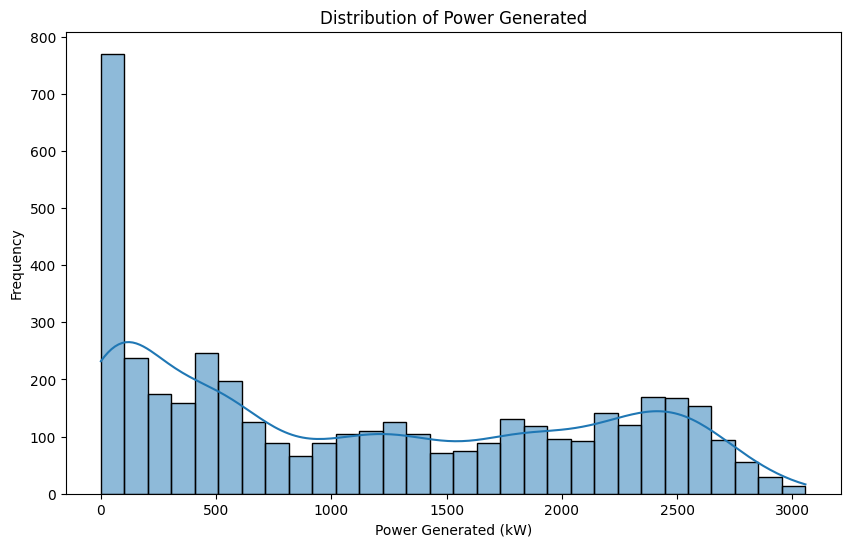

In [69]:
# Plot distribution of the power
plt.figure(figsize=(10, 6))
sns.histplot(df["generated_power_kw"], bins=30, kde=True)
plt.xlabel("Power Generated (kW)")
plt.ylabel("Frequency")
plt.title("Distribution of Power Generated")
plt.show()


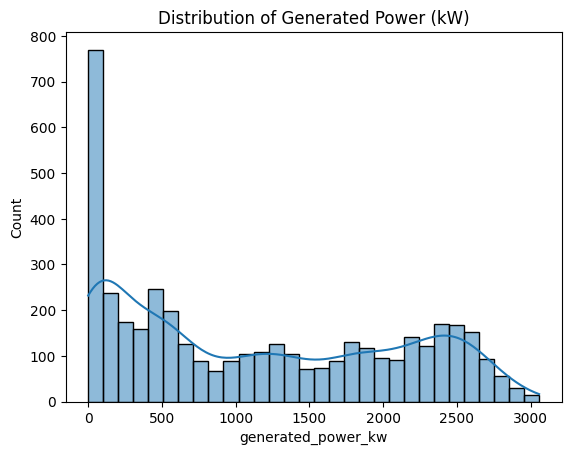

In [70]:
sns.histplot(df['generated_power_kw'], kde=True, bins=30)
plt.title('Distribution of Generated Power (kW)')
plt.show()

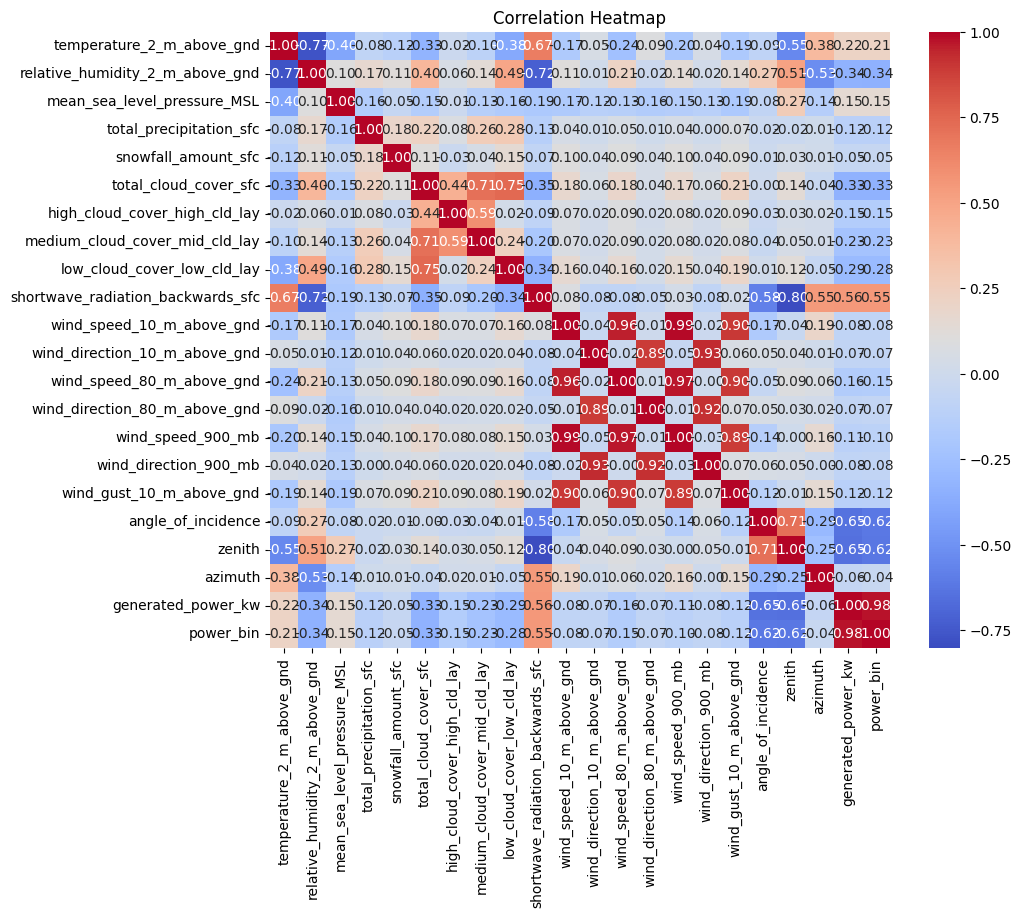

In [101]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [72]:
# Display column distributions
for column in df.columns:
    print(f"{column} Distribution:")
    print(df[column].value_counts())
    print("\n")


temperature_2_m_above_gnd Distribution:
temperature_2_m_above_gnd
12.35    7
17.50    7
23.64    7
8.12     6
16.64    6
        ..
11.23    1
11.62    1
4.21     1
2.41     1
6.54     1
Name: count, Length: 2413, dtype: int64


relative_humidity_2_m_above_gnd Distribution:
relative_humidity_2_m_above_gnd
34     80
33     79
26     77
48     77
40     76
       ..
9       5
10      5
8       4
100     3
7       2
Name: count, Length: 94, dtype: int64


mean_sea_level_pressure_MSL Distribution:
mean_sea_level_pressure_MSL
1018.1    40
1016.9    40
1014.1    39
1017.3    37
1016.6    37
          ..
1001.7     1
1006.6     1
1009.0     1
1036.1     1
1034.7     1
Name: count, Length: 376, dtype: int64


total_precipitation_sfc Distribution:
total_precipitation_sfc
0.0    3906
0.1      83
0.2      56
0.3      52
0.4      30
0.5      20
0.7      12
0.6      10
0.8       6
1.1       6
1.4       4
1.2       4
1.3       4
1.5       4
2.2       3
2.0       2
1.7       2
0.9       2
1.6       2

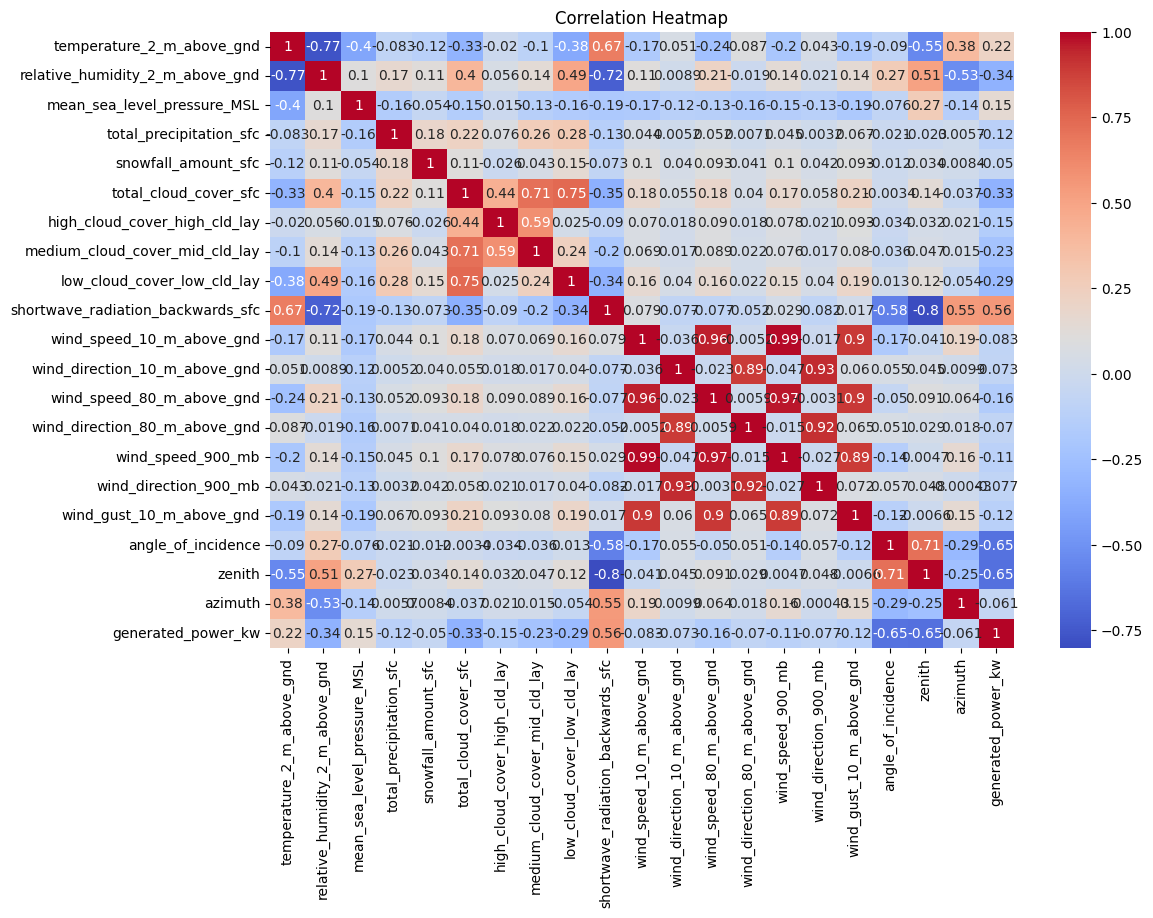

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


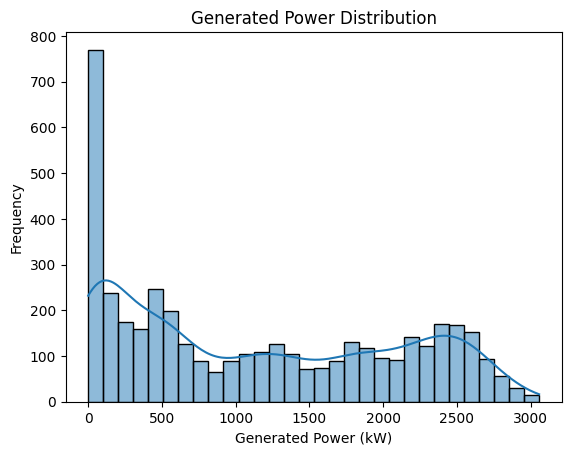

In [74]:
# Visualize target variable
sns.histplot(df['generated_power_kw'], kde=True, bins=30)
plt.title('Generated Power Distribution')
plt.xlabel('Generated Power (kW)')
plt.ylabel('Frequency')
plt.show()


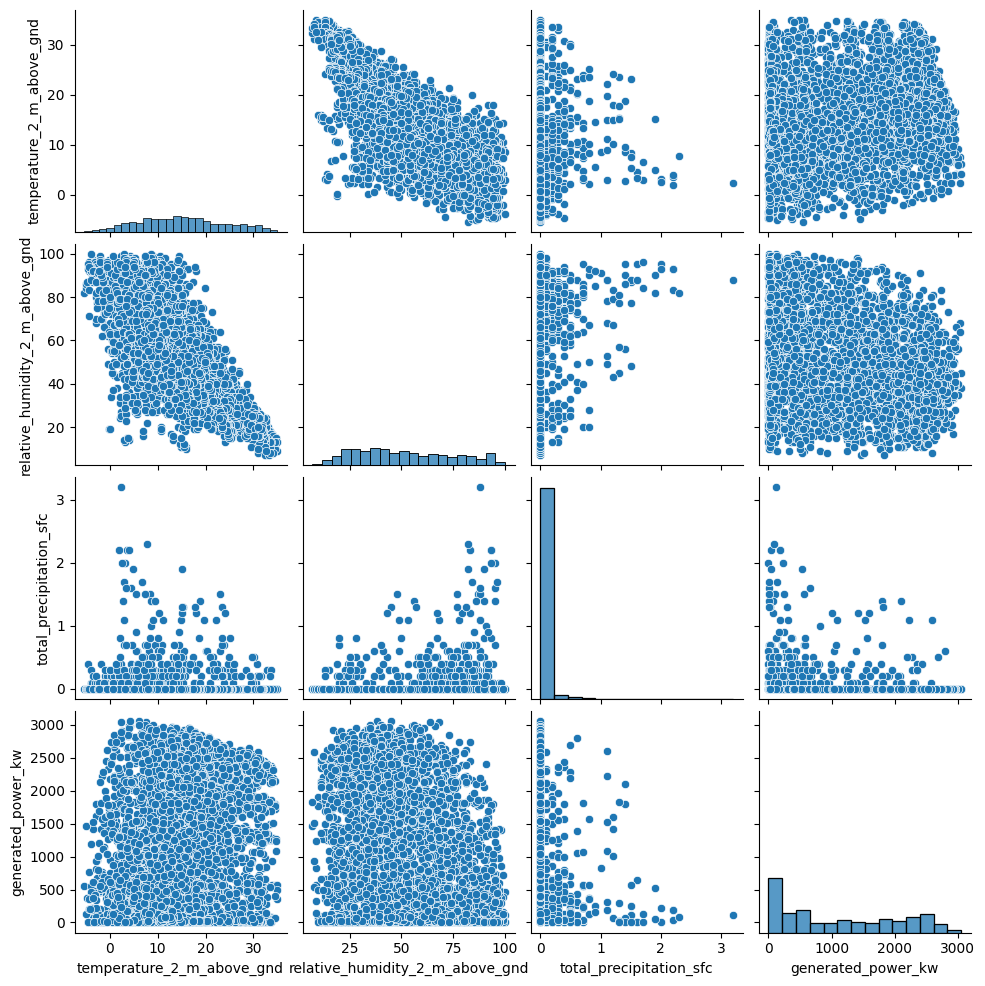

In [75]:
# Pairplot of selected features
selected_features = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd', 
                     'total_precipitation_sfc', 'generated_power_kw']
sns.pairplot(df[selected_features])
plt.show()


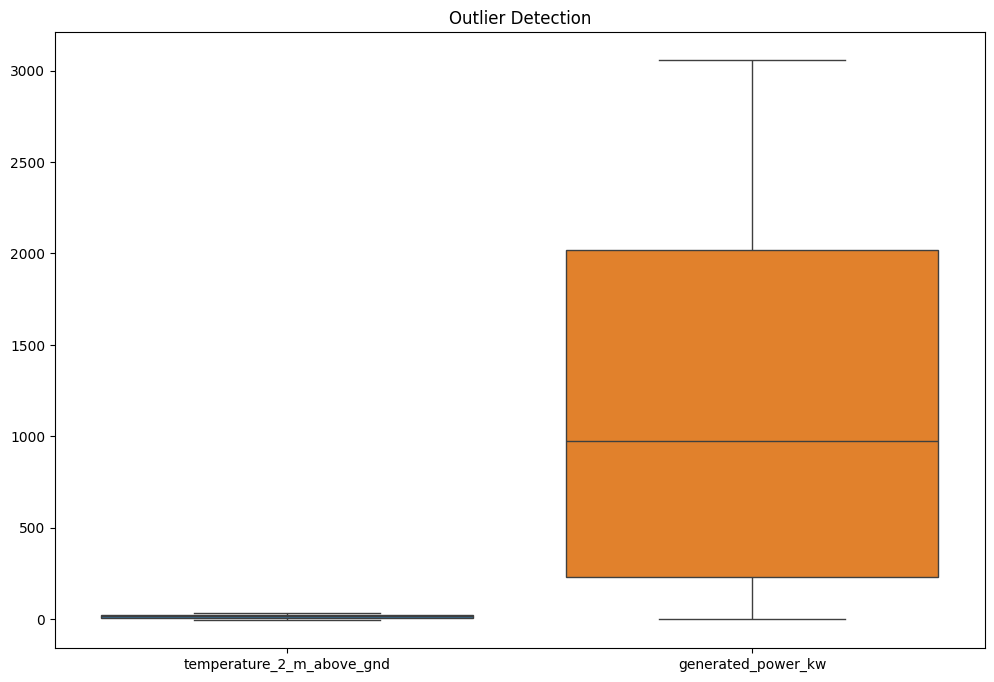

In [76]:
# Boxplot for detecting outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['temperature_2_m_above_gnd', 'generated_power_kw']])
plt.title("Outlier Detection")
plt.show()


#  Plot Histograms for All Columns

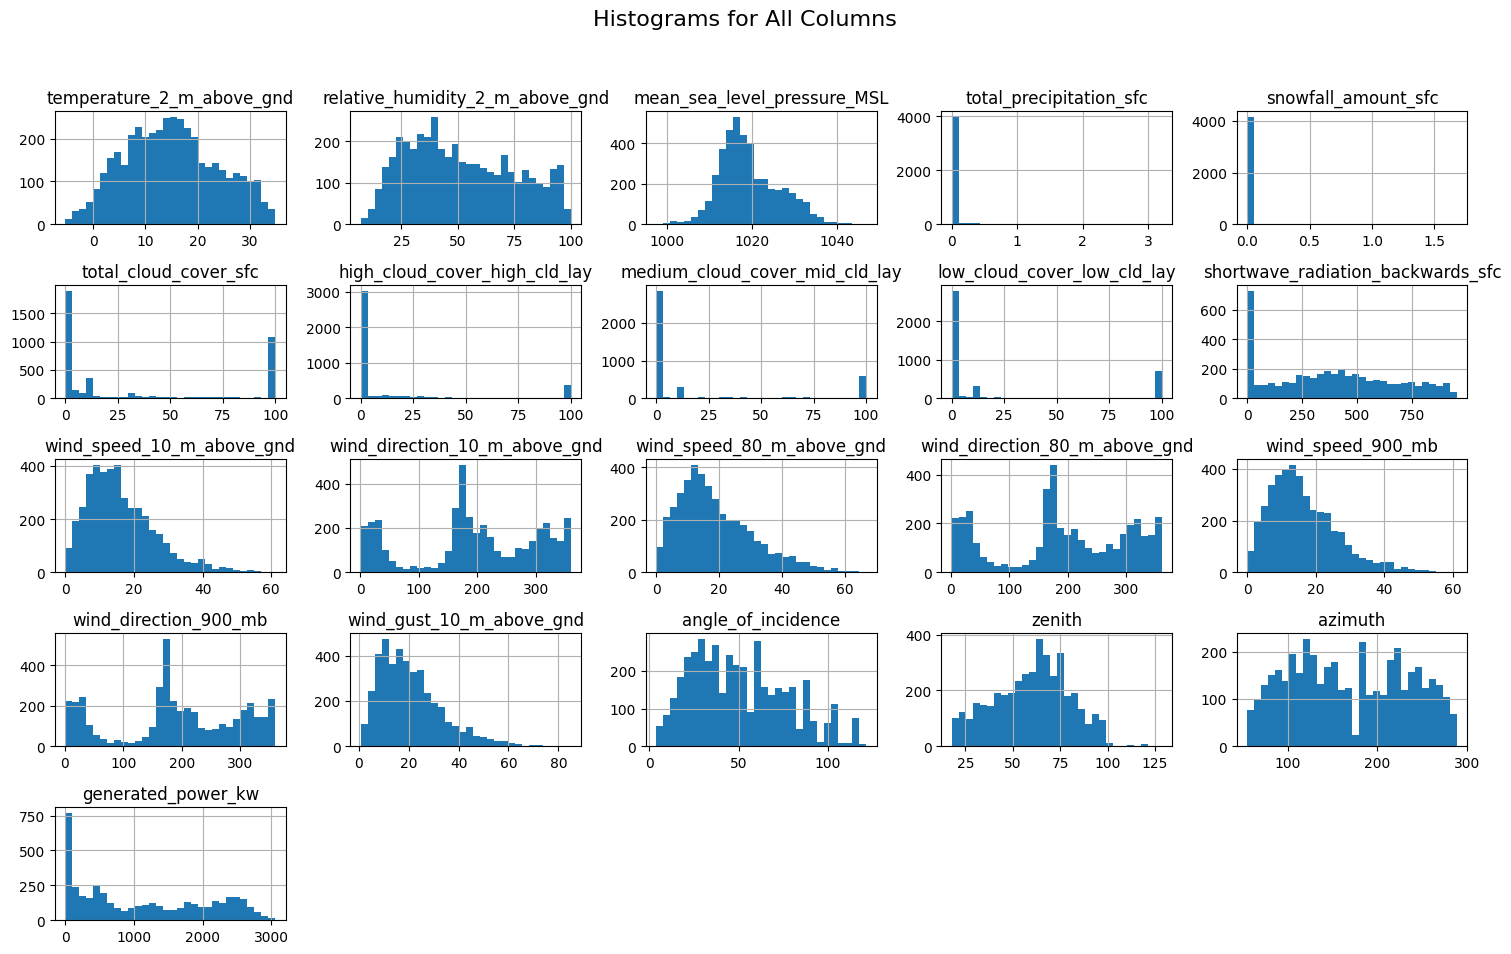

In [77]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms for All Columns", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot Box Plots for All Columns

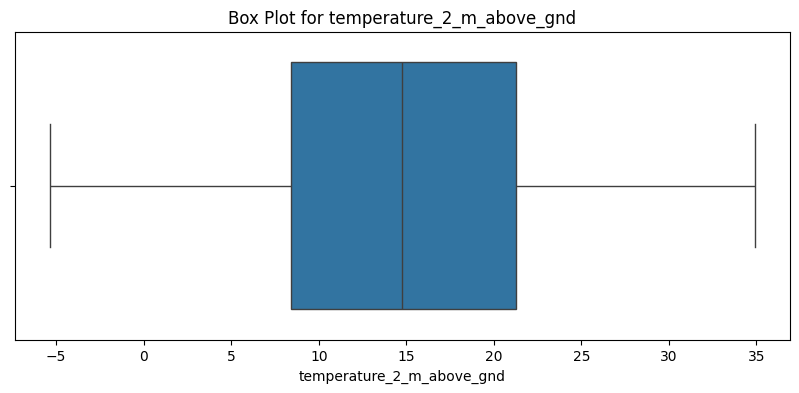

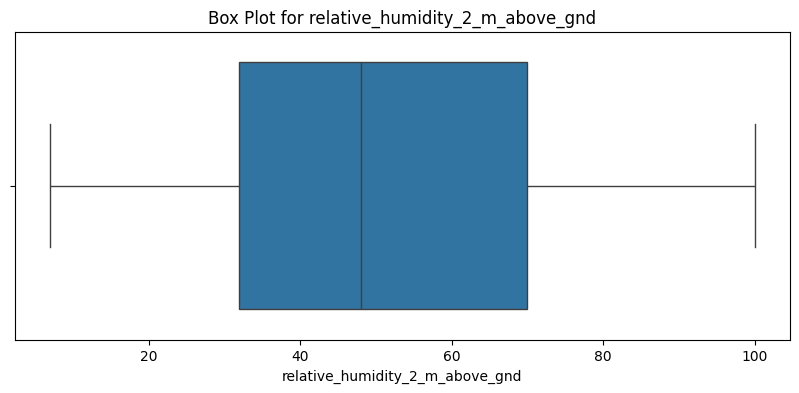

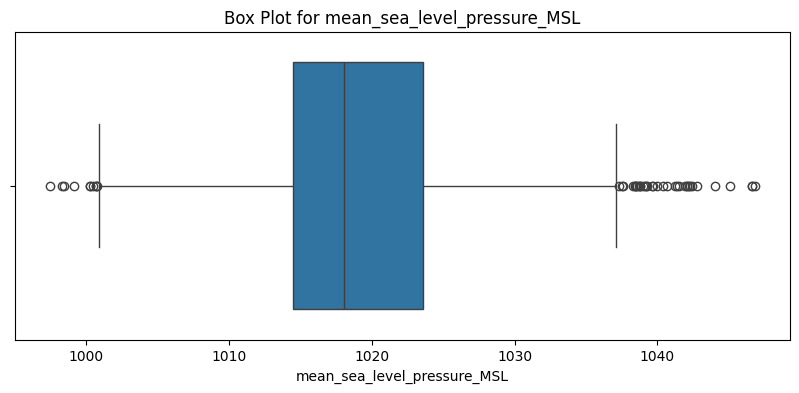

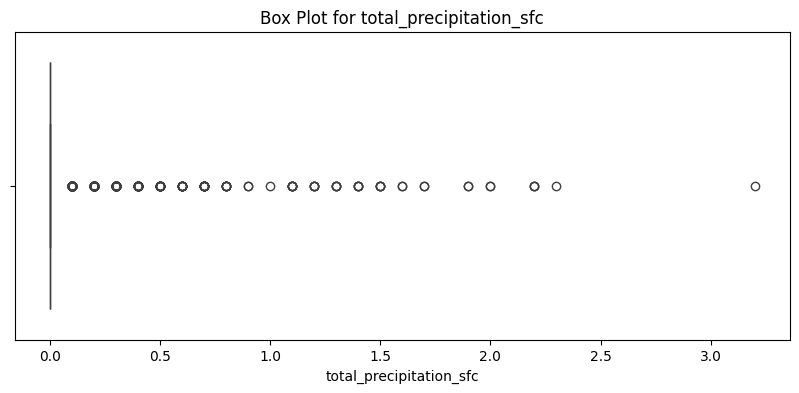

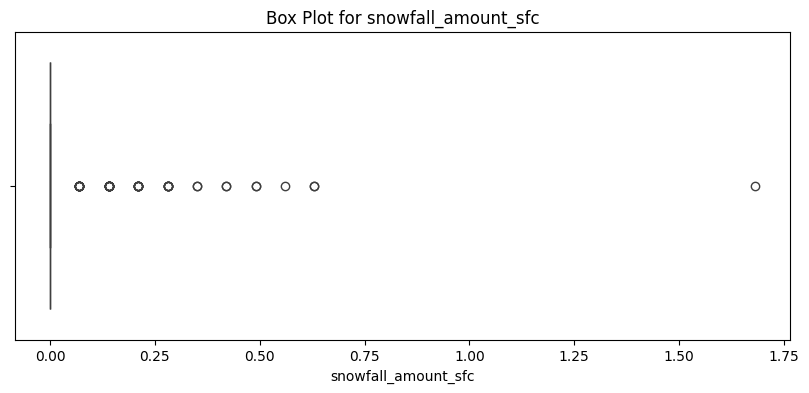

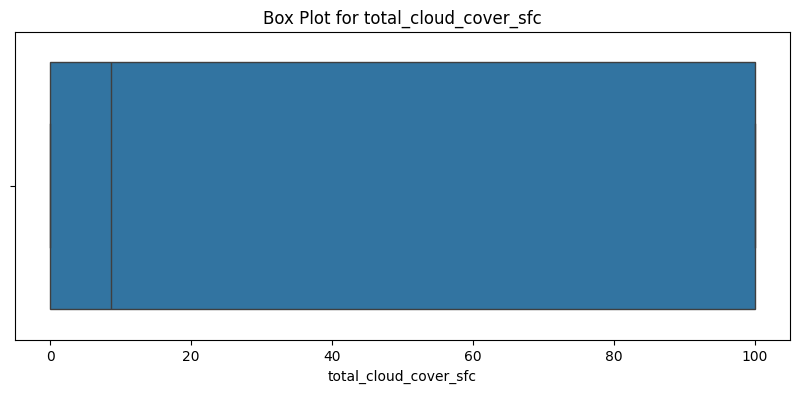

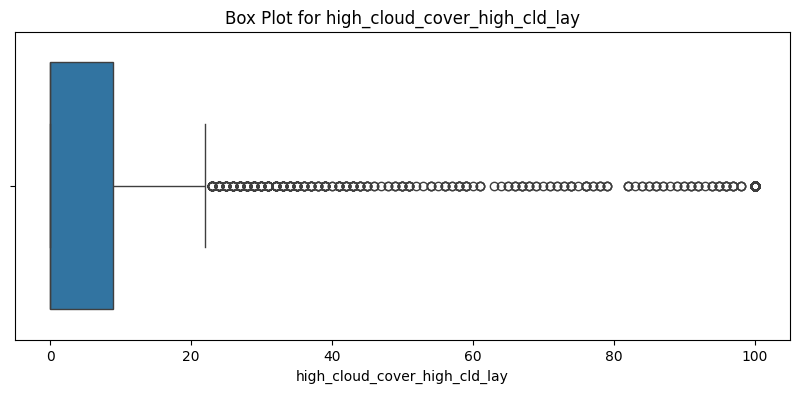

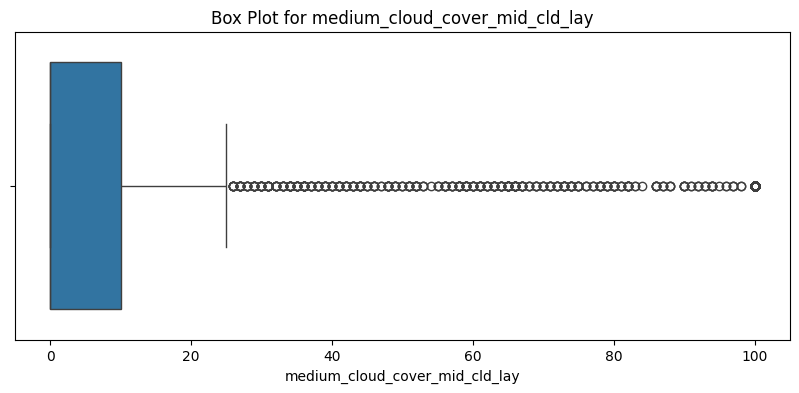

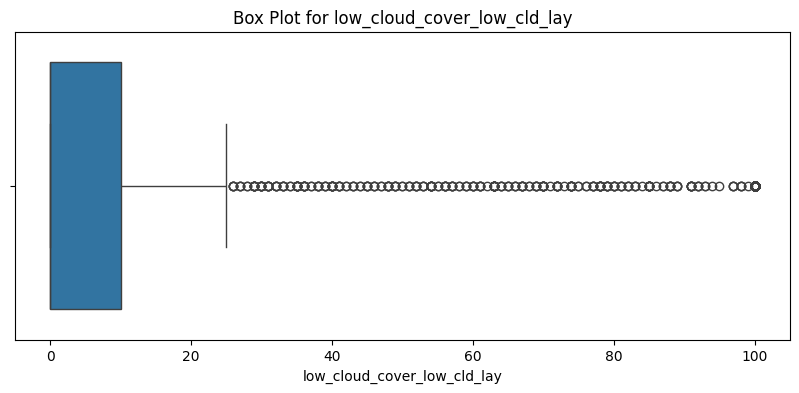

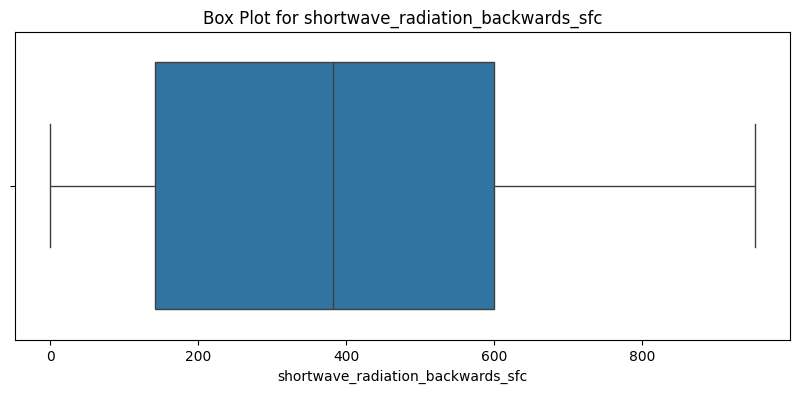

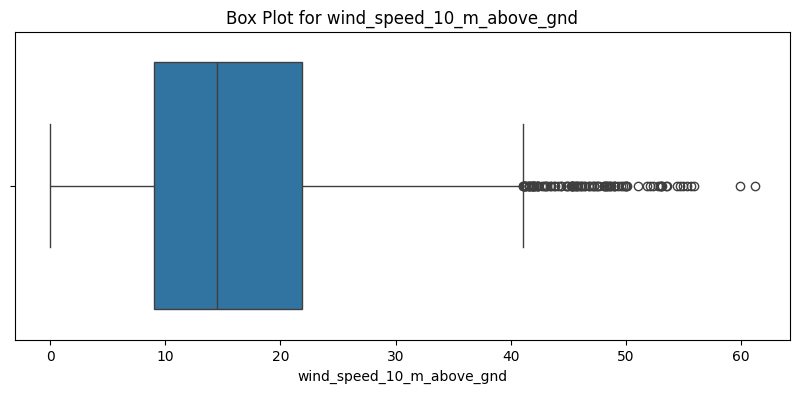

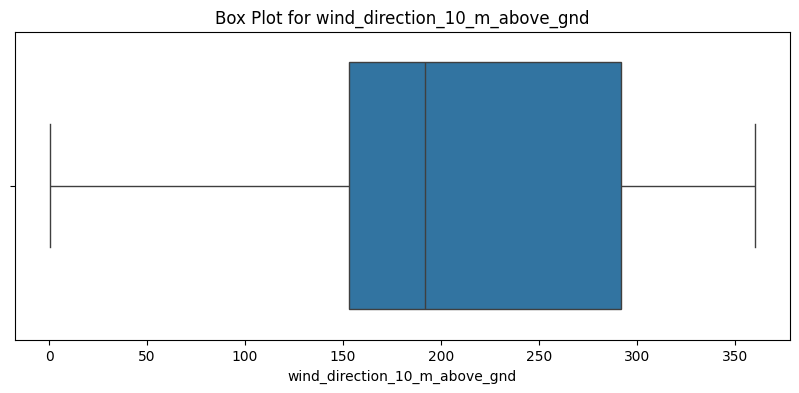

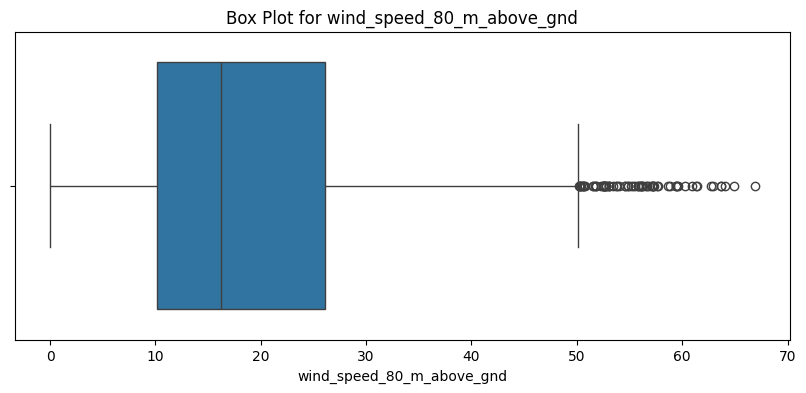

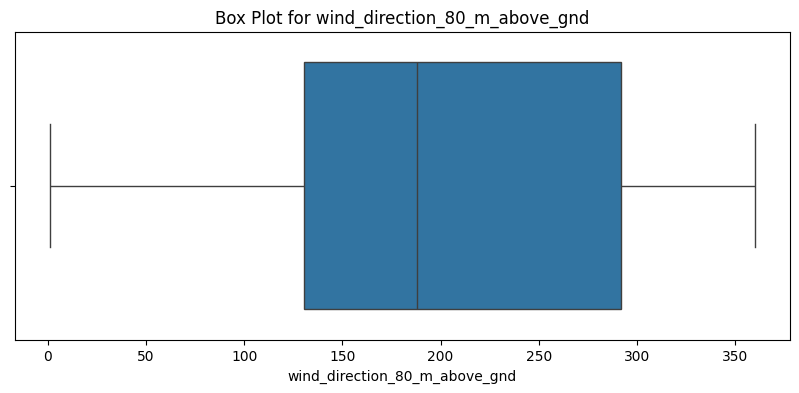

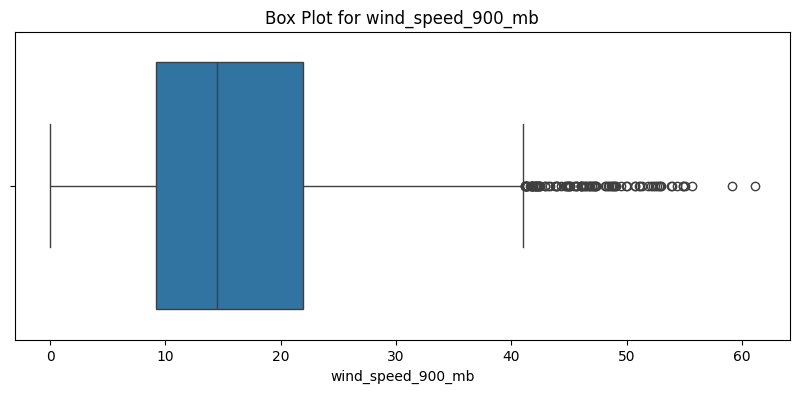

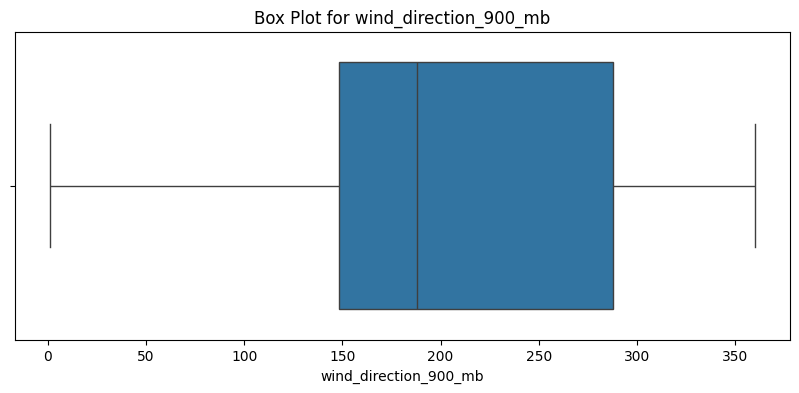

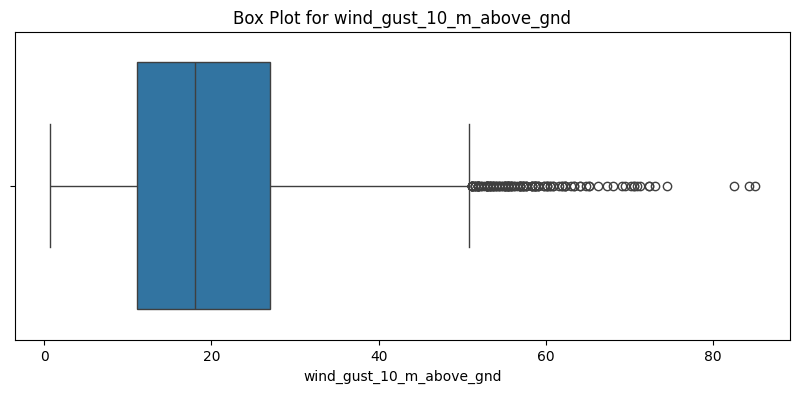

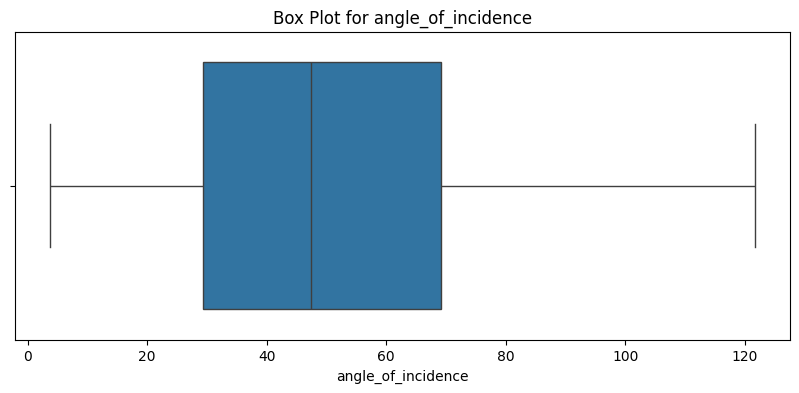

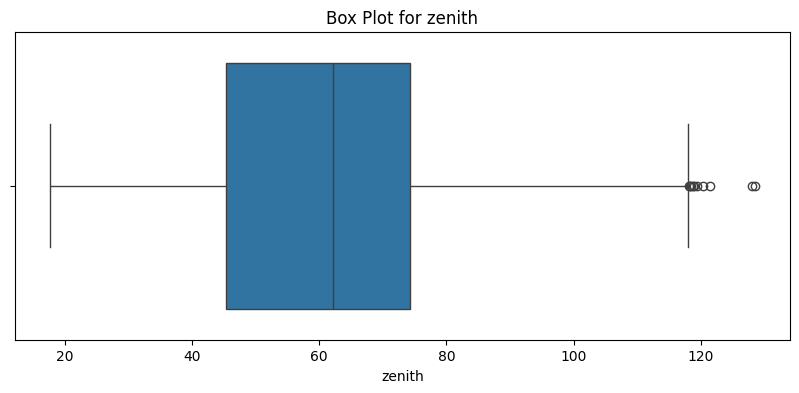

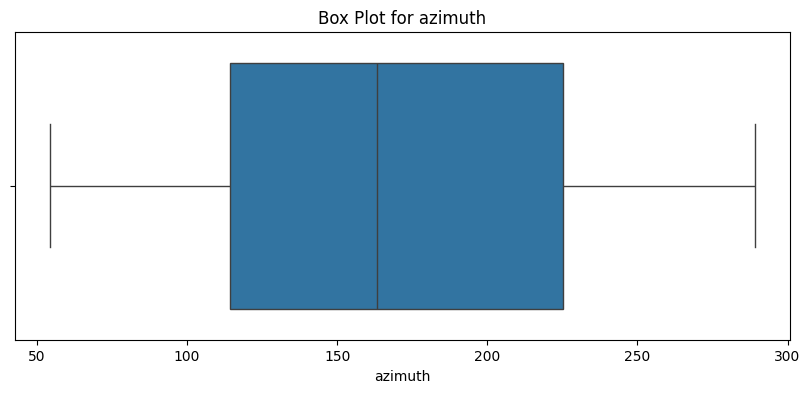

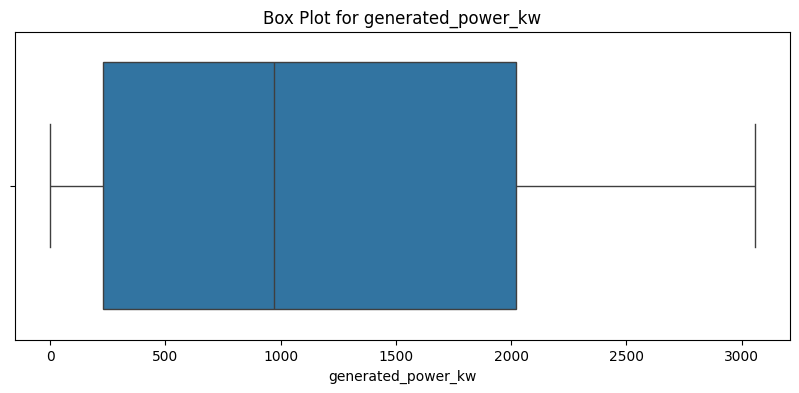

In [78]:
for col in df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()

#  Generate Scatter Plots for Each Column vs Solar Power Output

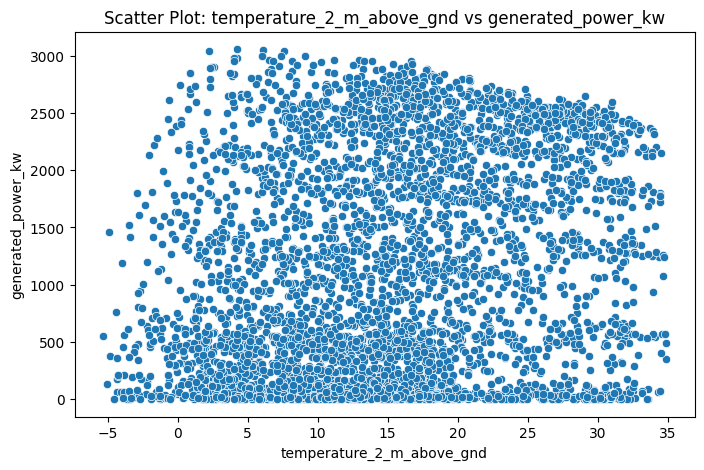

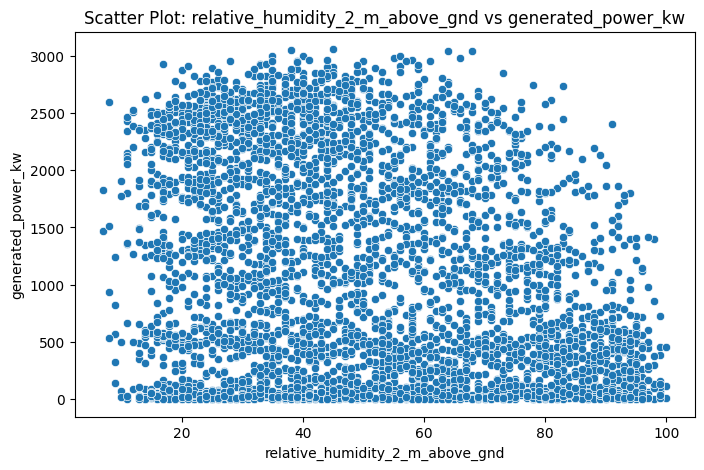

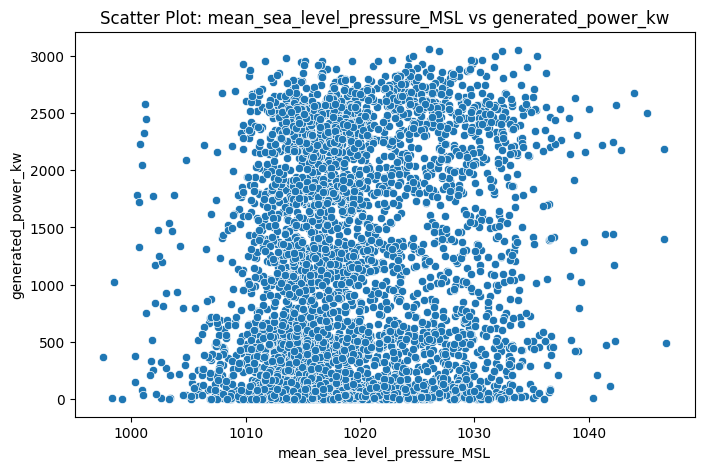

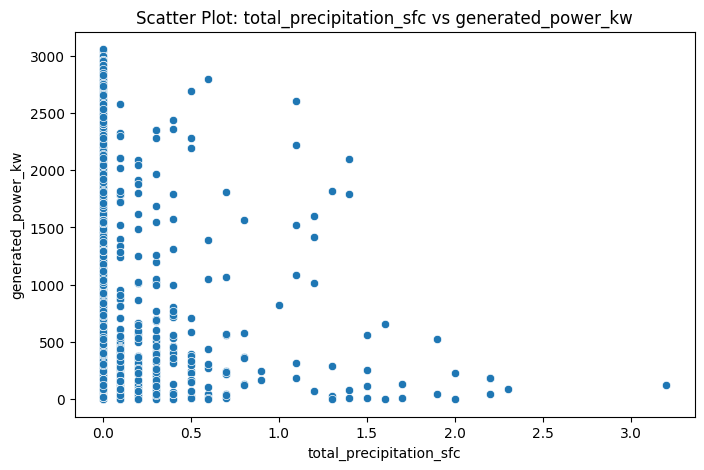

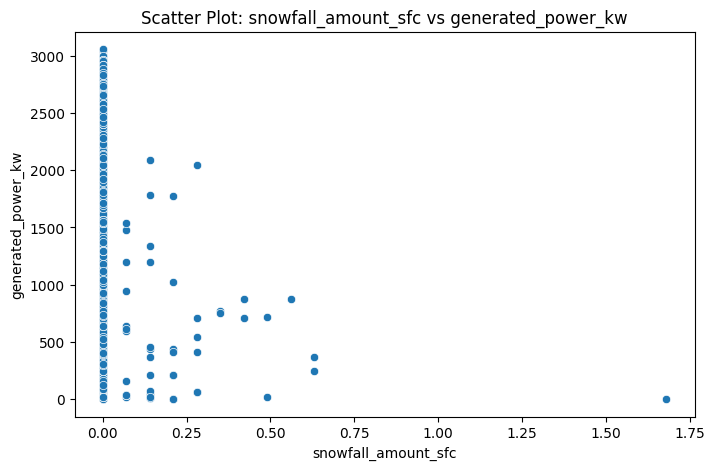

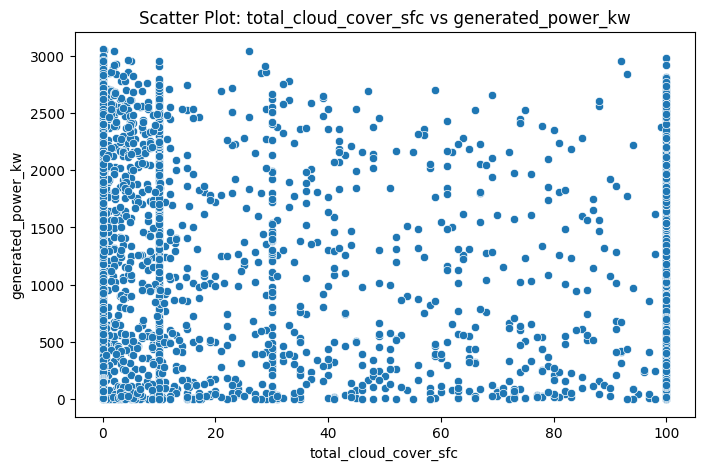

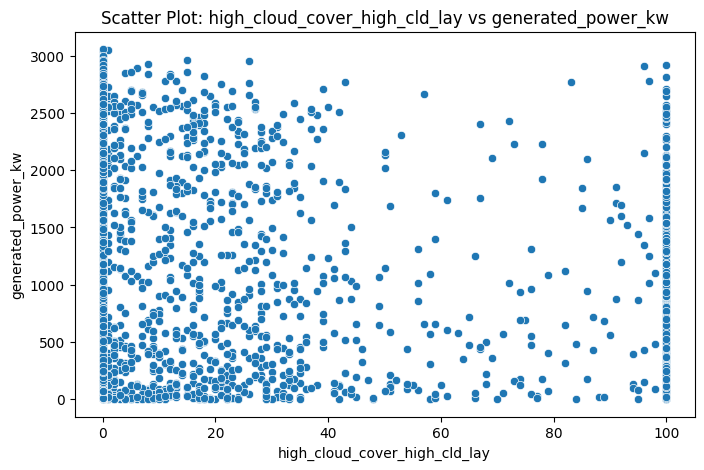

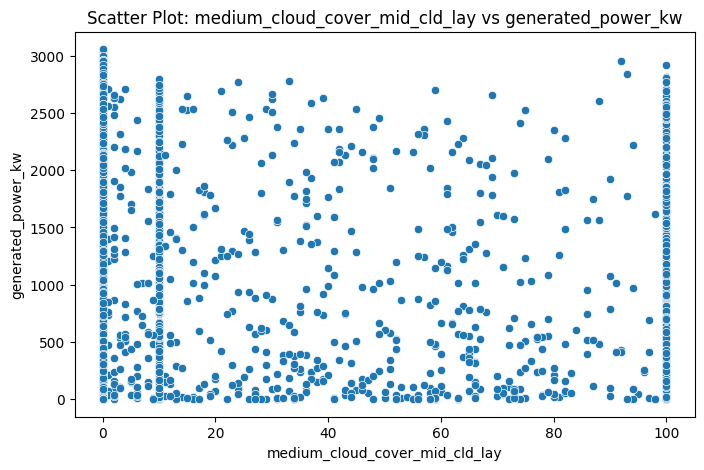

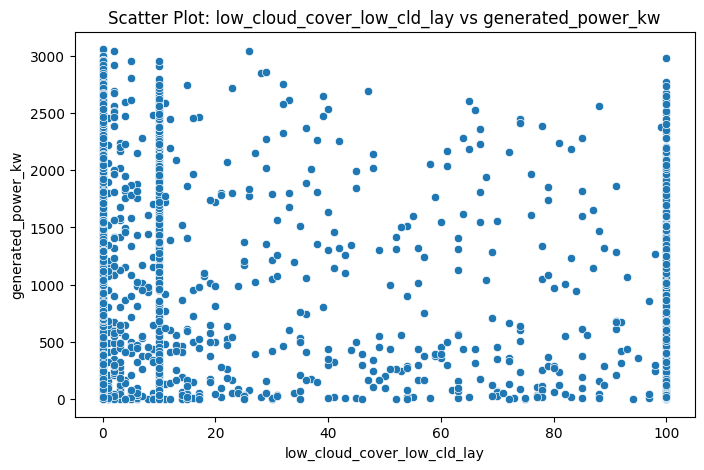

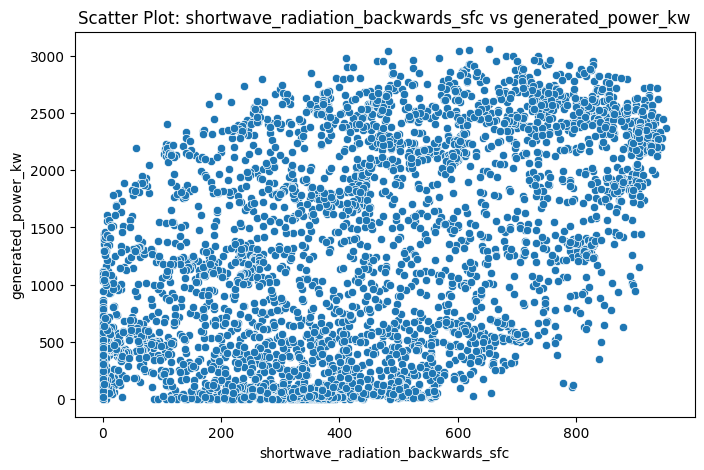

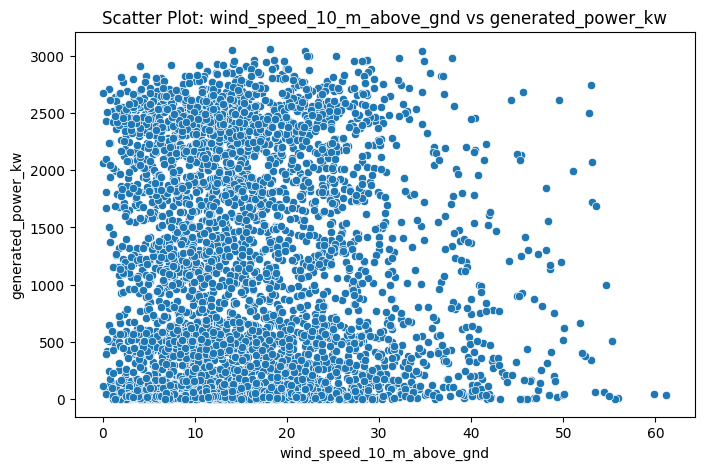

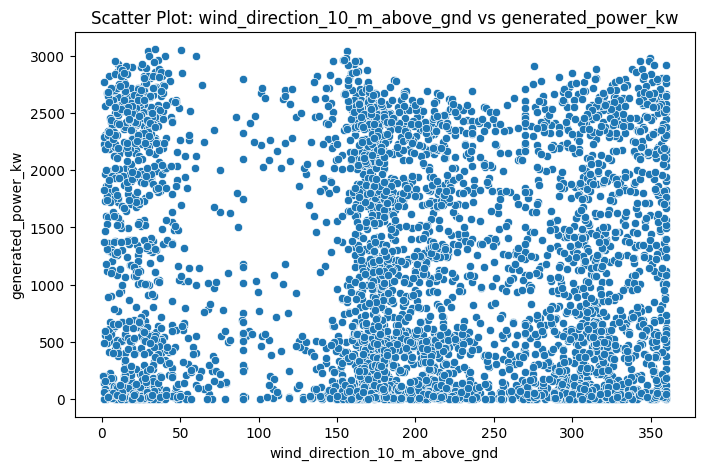

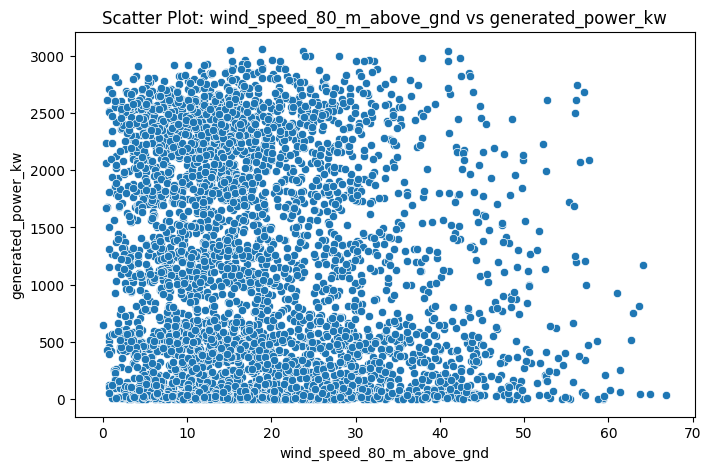

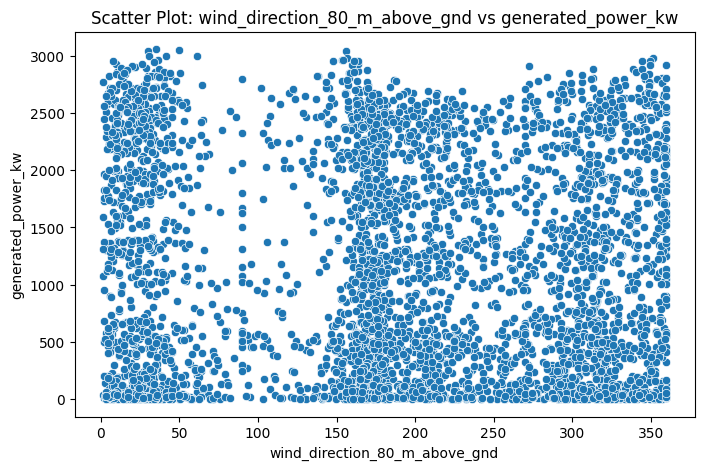

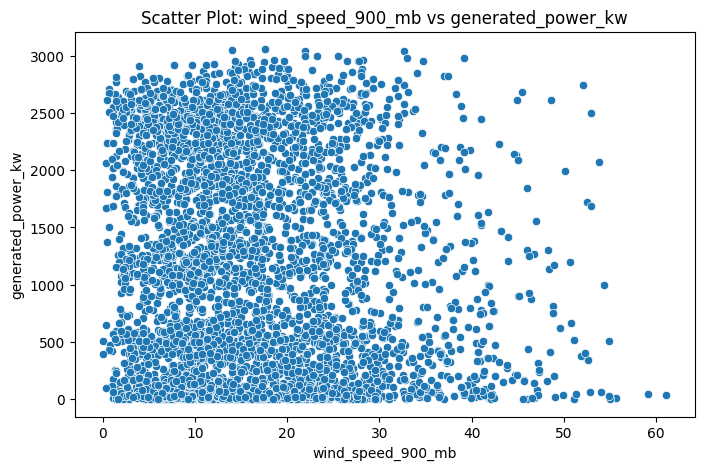

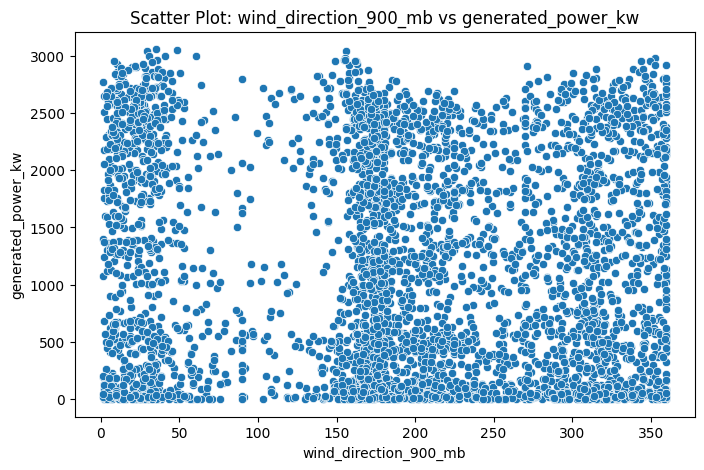

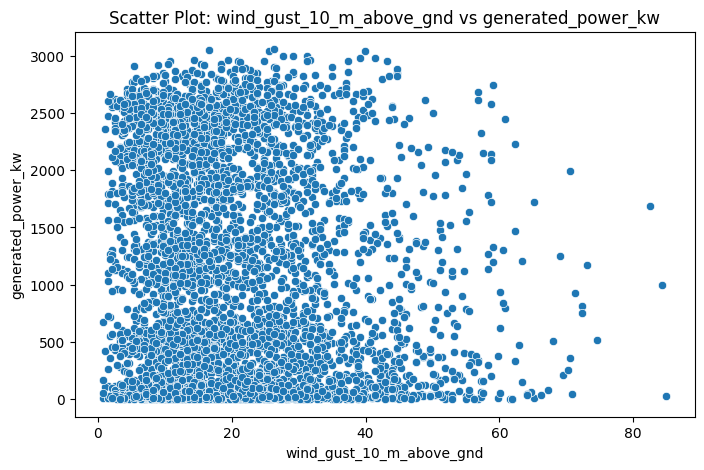

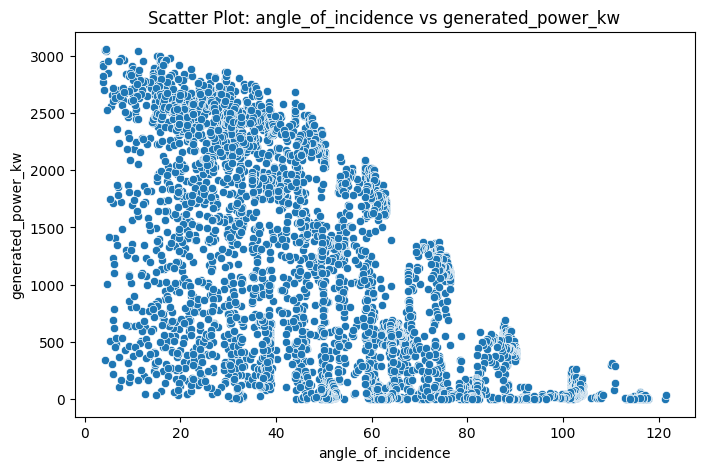

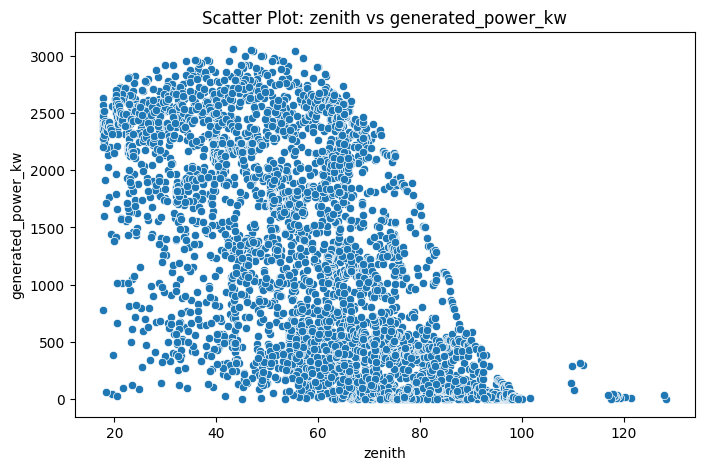

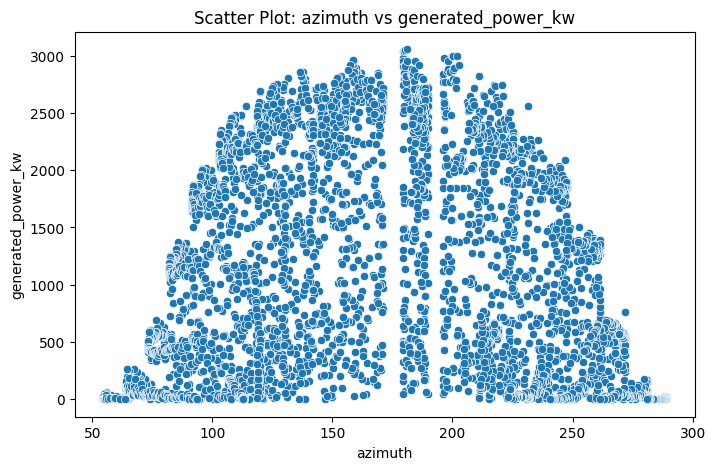

In [79]:
target = 'generated_power_kw'
# Create a list of all other columns (features) to compare against the target
features = [col for col in df.columns if col != target]

for col in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f'Scatter Plot: {col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

# Generate a Correlation Heatmap

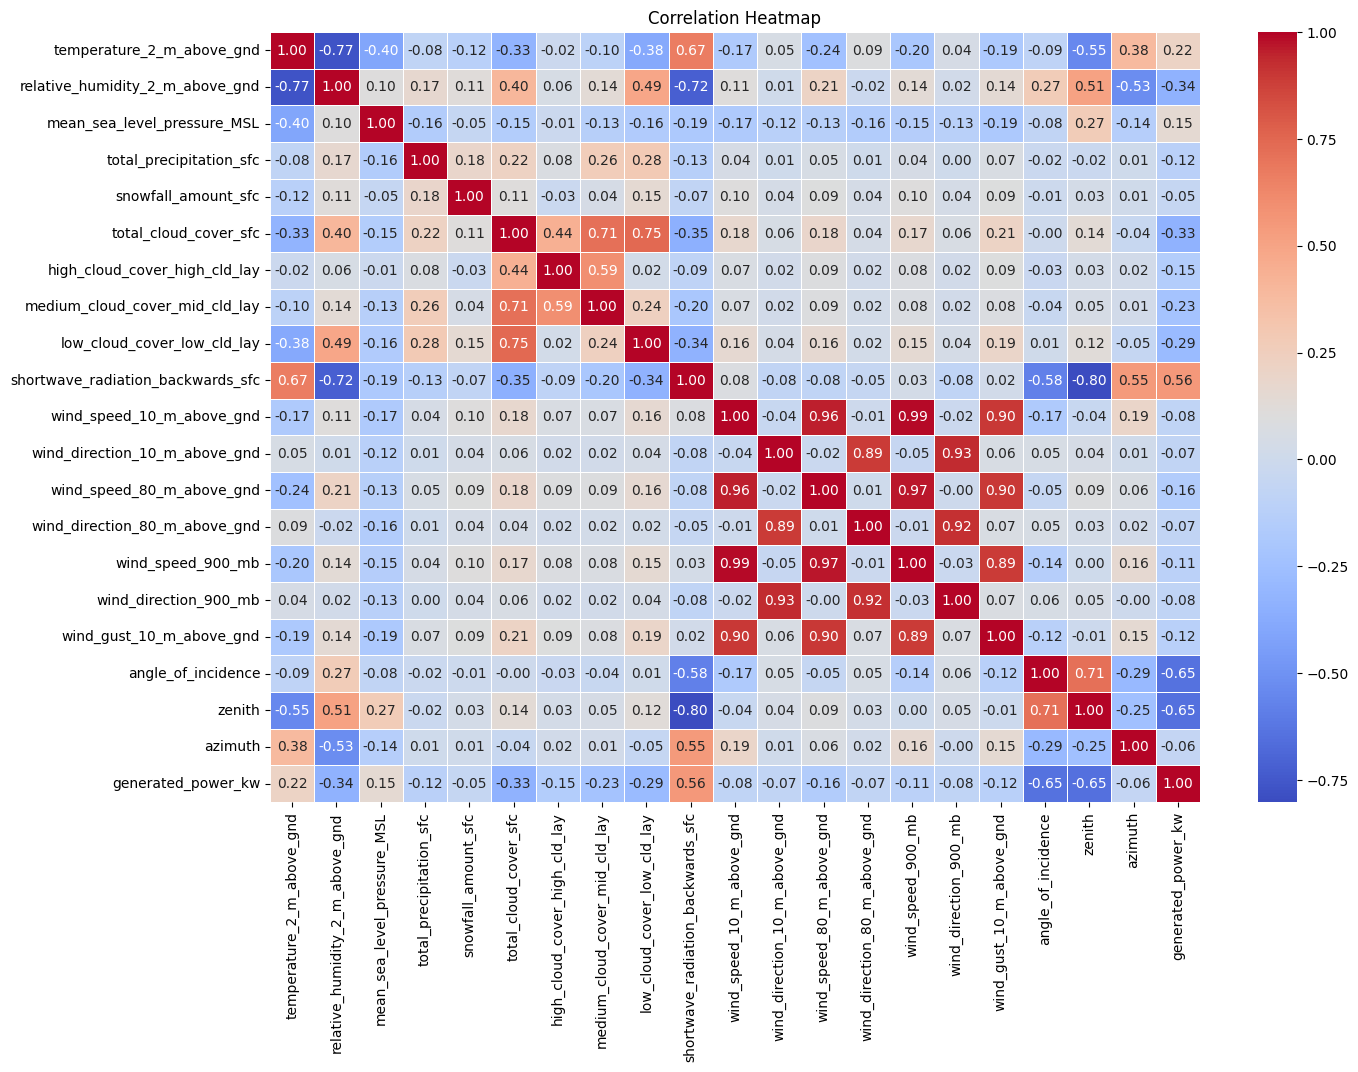

In [80]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Self practice2

# Additional EDA and Visualizations

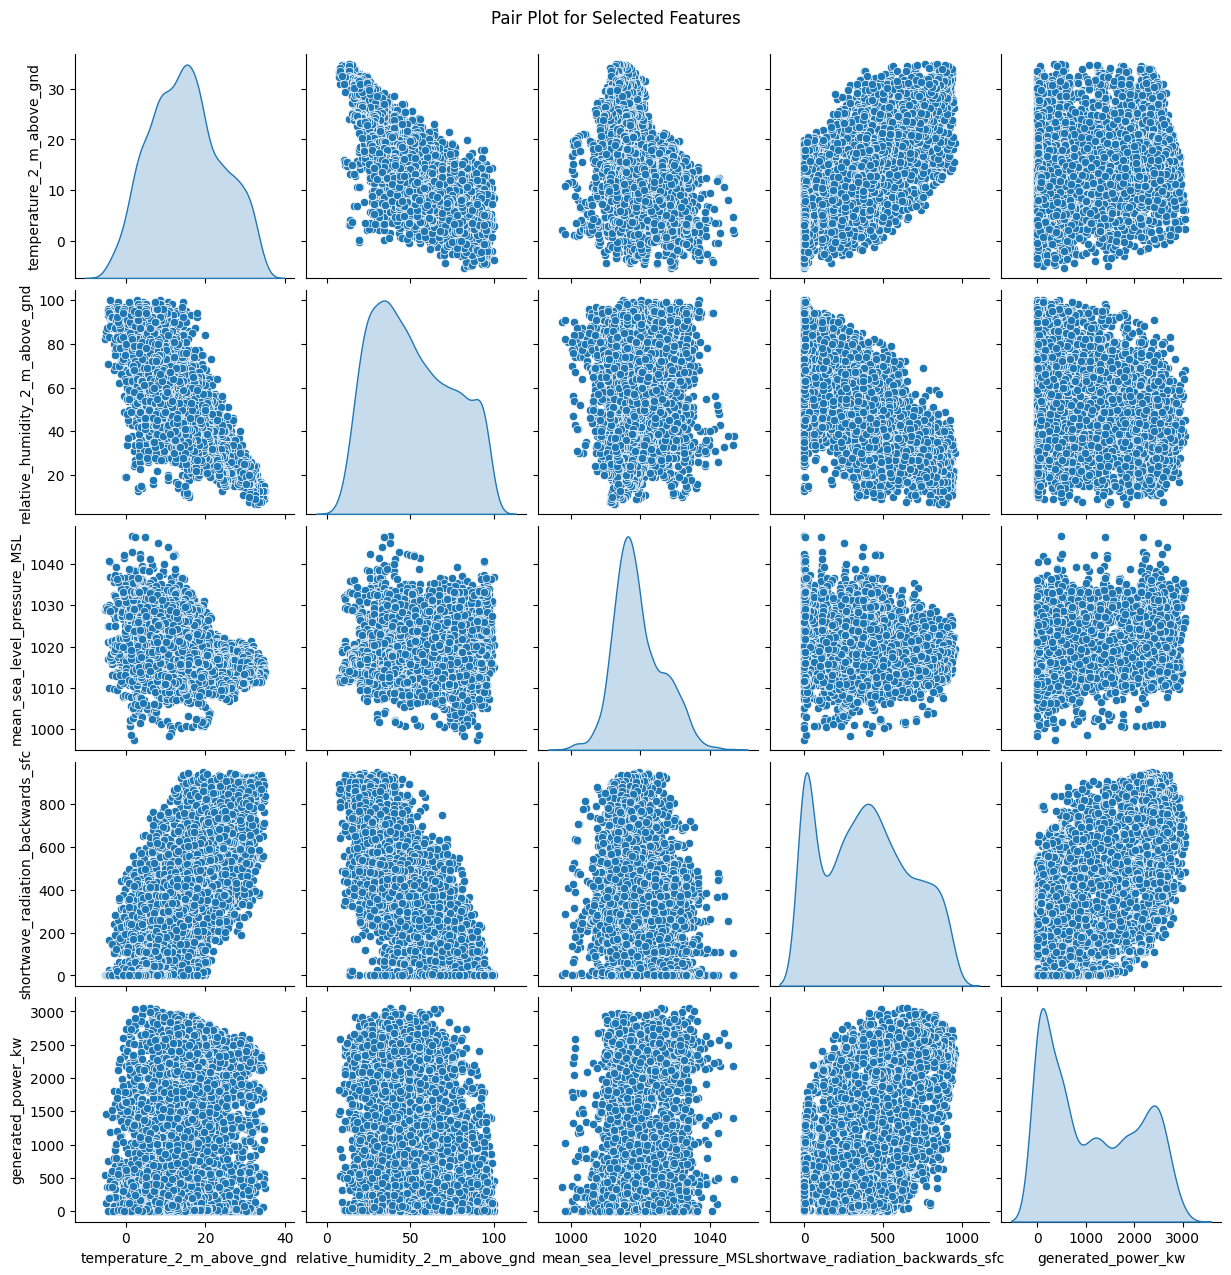

In [81]:
# Pair Plot: Visualize pairwise relationships between a subset of columns
subset_cols = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd', 
               'mean_sea_level_pressure_MSL', 'shortwave_radiation_backwards_sfc', 
               'generated_power_kw']
sns.pairplot(df[subset_cols], diag_kind="kde")
plt.suptitle("Pair Plot for Selected Features", y=1.02)
plt.show()

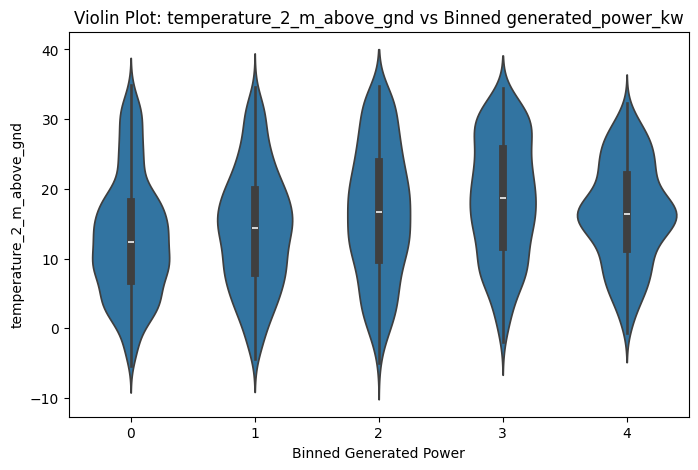

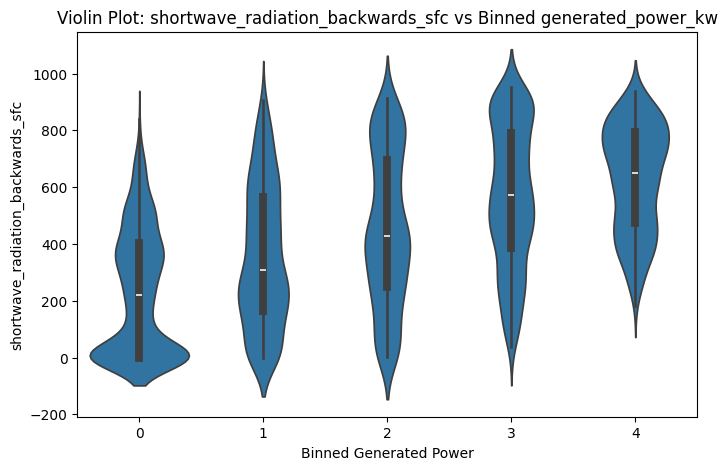

In [82]:

# Violin Plots: Show the distribution and density of numerical variables vs the target
df['power_bin'] = pd.cut(df[target], bins=5, labels=False)

features_for_violin = ['temperature_2_m_above_gnd', 'shortwave_radiation_backwards_sfc']
for col in features_for_violin:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='power_bin', y=col, data=df)
    plt.title(f'Violin Plot: {col} vs Binned {target}')
    plt.xlabel("Binned Generated Power")
    plt.ylabel(col)
    plt.show()

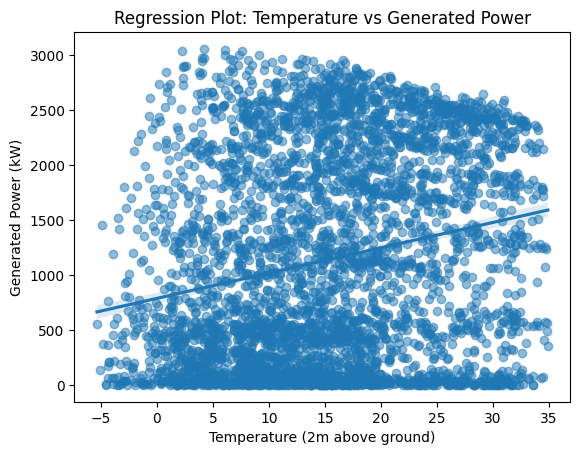

In [83]:
# Regression Plot: Explore linear trends with a regression line
sns.regplot(x='temperature_2_m_above_gnd', y=target, data=df, scatter_kws={'alpha':0.5})
plt.title("Regression Plot: Temperature vs Generated Power")
plt.xlabel("Temperature (2m above ground)")
plt.ylabel("Generated Power (kW)")
plt.show()


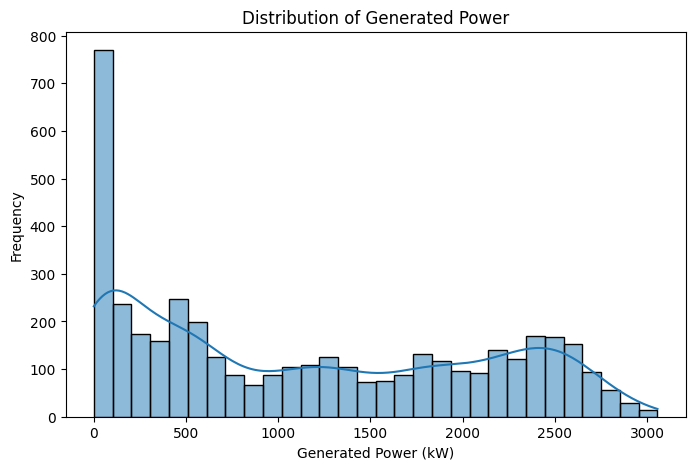

In [84]:
# Distribution Plot: Detailed view of the target variable's distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[target], kde=True, bins=30)
plt.title("Distribution of Generated Power")
plt.xlabel("Generated Power (kW)")
plt.ylabel("Frequency")
plt.show()


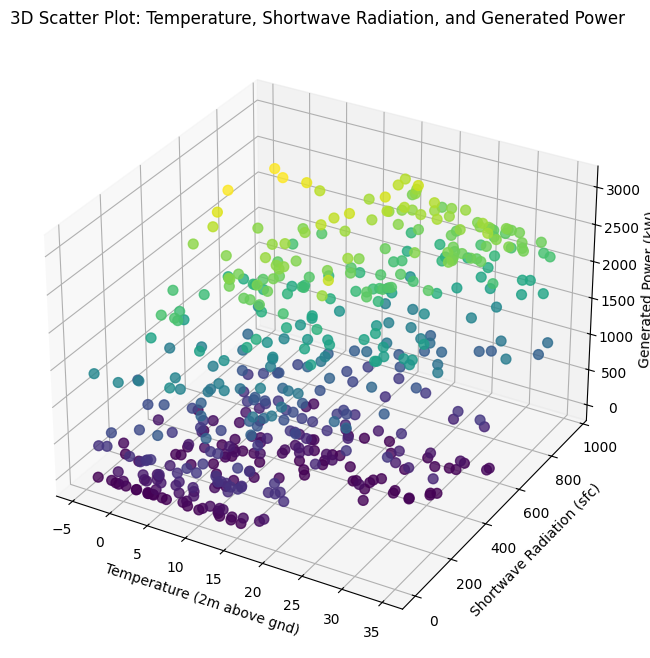

In [85]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sample_df = df.sample(n=500, random_state=42)
ax.scatter(sample_df['temperature_2_m_above_gnd'], 
           sample_df['shortwave_radiation_backwards_sfc'], 
           sample_df['generated_power_kw'],
           c=sample_df['generated_power_kw'], cmap='viridis', s=50, alpha=0.8)
ax.set_xlabel('Temperature (2m above gnd)')
ax.set_ylabel('Shortwave Radiation (sfc)')
ax.set_zlabel('Generated Power (kW)')
plt.title("3D Scatter Plot: Temperature, Shortwave Radiation, and Generated Power")
plt.show()


# Week 3

In [86]:
print(df.isnull().sum())


temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
power_bin                            0
dtype: int64


In [87]:
X = df.drop(columns=['generated_power_kw'])
y = df['generated_power_kw']


In [88]:
# pip install scikit-learn

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [92]:
y_pred = model.predict(X_test)


In [93]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 146.88685462319032
MSE: 29613.628246576478
RMSE: 172.0861070702004
R² Score: 0.967580949217651


# Self Learning

## Standardizes the input data to improve the result.

This function applies standardization to the input data, which can help in improving the performance of machine learning models by ensuring that the data has a mean of 0 and a standard deviation of 1.


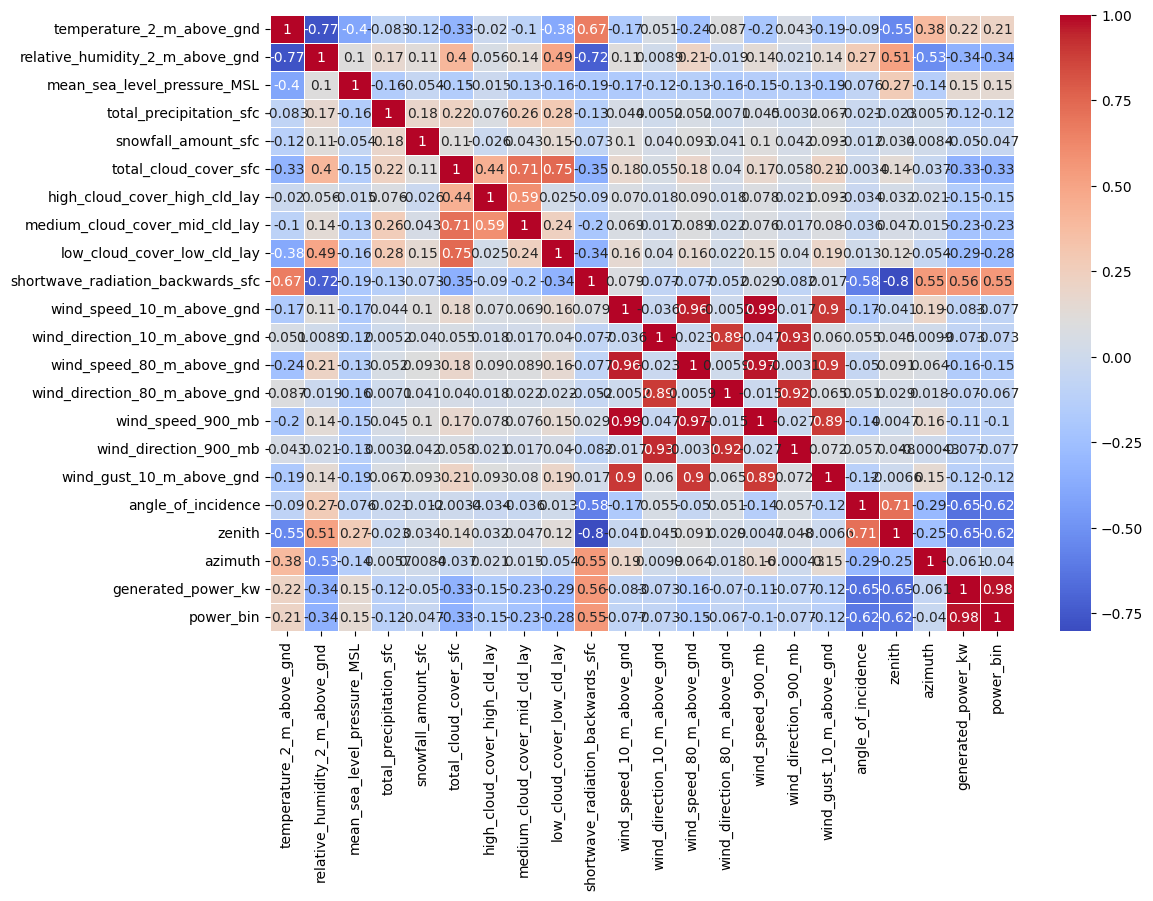

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()


In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = features


In [96]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['generated_power_kw'])  # Features
y = df['generated_power_kw']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.967580949217651
MAE: 146.88685462319032
RMSE: 172.0861070702004


# final verdict 

Without StandardScaler the r2 score is : 0.967580949217651
Witho StandardScaler the r2 score is : 0.967580949217651

Hence there was not signinificant improvement in model performance

## let's try another method to see if accuracy  imporves or not

In [99]:
# Standardize features (for stable training)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features (Optional: Improves accuracy if relationships are nonlinear)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cross-validation score (Ensures model generalization)
cv_score = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2').mean()

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Cross-Validation R² Score: {cv_score:.4f}")


MAE: 142.1798
MSE: 37957.2429
R² Score: 0.9584
Cross-Validation R² Score: 0.5156


### Since the R2 score went down from 0.96 to 0.51 
Hence, using PolynomialFeatures may not be the best option here.
So, we should go with simple linear regression here with StandardScaler

# Extracting the model to pkl file to use in streamlit 

In [100]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

X = df.drop(columns=['generated_power_kw'])
y = df['generated_power_kw']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'linear_regression_model.pkl')

print("Model trained and saved successfully!")


Model trained and saved successfully!


In [104]:
# train_and_save_model.py

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# Load the dataset (adjust the file path as needed)
df = pd.read_csv("Dataset/solarpowergeneration.csv")

# Define features and target.
# Here we use all columns except the target column.
X = df.drop(columns=["generated_power_kw"])
y = df["generated_power_kw"]

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model.
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model to disk.
joblib.dump(model, "linear_regression_model.pkl")
print("Model trained and saved successfully!")


Model trained and saved successfully!
